# <b>Titanic Introduction</b>

### What?
The aim of this Notebook is to create a predictive model to predict whether the passengers on the Titanic are likely to Die or Survive based on the parameters such as <b><i>Gender, Passenger Class...etc</b></i>

### Process?
The first step is to analyse the data and report the observations to gain an understanding of the status quo.
<p>
Following this, we will proceed to clean the data and look for any anomalies including the distribution of the data to understand which parameters represent a more accurate statistical interpretation.

In [2]:
# Import all Python packages required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # To display retina quality plots

In [3]:
# Reading in the train CSV file
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Exploring the Data and Data Columns.
The next step is to begin looking at the data and data columns to understand the expected data and data types.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Data Columns, Data Types and Expectations
The above output shows <b><i>12 columns</b></i>  with varying data types. Some 
data types are expected such as <b>int64</b> for <b><i>PassengerID</b></i> and <b><i>Pclass</b></i>, while others are not expected, such as <b><i>object</b></i> for <b><i>Name</b></i> and <b><i>Sex</b></i>.<br>
With a little exploration we will look into these data columns.

## Missing Data
We can see from the output above that the <b><i>train</b></i> dataset has 891 rows of data, and that there are a number of columns that have data missing. These the are the  <b><i>Age</b></i> and <b><i>Cabin</b></i>.
<p>

The <b><i> test </b></i> dataset has 417 rows of data and 11 columns. Similar to the train dataset, the <b><i>Age</b></i> and <b><i>Cabin</b></i> columns have a large amount of missing values which would have to be dealt with.

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Variable Breakdown

* <b>PassengerID</b>
* <b>Survived:</b> 0 = No, 1 = Yes
* <b>PClass:</b> Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd 
* <b>Sex:</b> male = Male, female = Female
* <b>Age:</b> in Years
* <b>SibSp:</b> # of siblings/spouse aboard the Titanic
* <b>Parch:</b> # of parents/children aboard the Titanic
* <b>Ticket:</b> the ticket number of the passenger
* <b>Cabin:</b> cabin # of each passenger
* <b>Embarked:</b> port of embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

## What Questions am I trying to answer?
### * How many passengers on the Titanic were Male/Female?
### * How many passengers were from varying passenger Class?
* > How many were Male/Female?
### * How many passengers embarked from various Embarkation points?
* > How many were Male/Female?
### * How many Died/Survived?
* > Out of those who Died: How many were Male/Female?
* > Out of those who Survived: How many were Male/Female?
### * How many Died/Survived based on passenger Class?
* > Out of those who Died: How many were Male/Female?
* > Out of those who Survived: How many were Male/Female?
### * How many Died/Survived based on point of Embarkation?
* > Out of those who Died: How many were Male/Female?
* > Out of those who Survived: How many were Male/Female?

## Lets start with the Missing Data
First we need to get an understanding of the number of missing data we have in each dataset

### Training Dataset

In [7]:
train.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Test Dataset

In [8]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Plot Functions
Below are the plot functions which will be repeatedly used:
* Countplot Function
* Countplot with hue
* Histograph plot Function

In [9]:
#Old countplot function
'''
def countplot(column, data_frame, plot_title):
    plt.figure(
        figsize = (
            5,
            2.5
        )
    )
    sns.countplot(
        x = column,
        data = data_frame,
        palette = 'Paired'
    ).set(
        title=plot_title
        )
    sns.set_style(
        'darkgrid'
    )
    return plt.show()
    '''
#Countplot function
def countplot(data_col, data, plot_title, xticklabel1=False, xticklabel2=False):
    if bool(xticklabel1) or bool(xticklabel2):
        fig, axes = (
            plt
            .subplots(
                figsize=(
                    4,
                    3
                ),
                constrained_layout = True
            )
        )
        data = (
            sns
            .countplot(
                x = data_col,
                data = data,
                ax = axes,
                palette = 'Paired'
            )
        )
        axes_title = (
            axes
            .set_title(
                plot_title
            )
        )
        axes_xticklabel = (
            axes
            .set_xticklabels(
                [
                    xticklabel1,
                    xticklabel2
                ]
            )
        )
        return plt.show()
    else: 
        fig, axes = (
            plt
            .subplots(
                figsize=(
                    4,
                    3
                ),
                constrained_layout = True
            )
        )
        data = (
            sns
            .countplot(
                x = data_col,
                data = data,
                ax = axes,
                palette = 'Paired'
            )
        )
        axes_title = (
            axes
            .set_title(
                plot_title
            )
        )
        return plt.show()

#Countplot function with hue
def hue_countplot(
    x_data,
    hue_data, 
    data, 
    fig_title, 
    y_label,
    x_label,
    legend_title,
    xticklabel1=False,
    xticklabel2=False 
):
    if bool(xticklabel1) or bool(xticklabel2):
        fig,axes = (
            plt.subplots(
                figsize=(
                    7,
                    5
                ),
                constrained_layout = True
            )
        )
        data_hue = (
            sns.countplot(
                x = x_data,
                hue = hue_data,
                data = data 
            )
        )
        fig_title = (
            fig.suptitle(
                fig_title,
                fontsize = 20 
            )
        )
        axes_ylabel = (
            axes.set_ylabel(
                y_label,
                size = 10
            )
        )
        axes_xlabel = (
            axes.set_xlabel( 
            x_label,
            size = 10
            )
        )
        '''
        IF xticklabel1 or xticklabel2 TRUE then use this code, otherwise exclude it.
        '''
        axes_xtick_label = (
            axes.set_xticklabels(
                [
                    xticklabel1,
                    xticklabel2
                ],
                size = 10
            )
        )
        plot_legend = (
            data_hue.legend(
                title = legend_title
            )
        )
        return fig.show()
    else: # This is when there are more than 2 xticklabels 
        fig,axes = (
            plt.subplots(
                figsize=(
                    7,
                    5
                ),
                constrained_layout = True
            )
        )
        data_hue = (
            sns.countplot(
                x = x_data,
                hue = hue_data,
                data = data 
            )
        )
        fig_title = (
            fig.suptitle(
                fig_title,
                fontsize = 20 
            )
        )
        axes_ylabel = (
            axes.set_ylabel(
                y_label,
                size = 10
            )
        )
        axes_xlabel = (
            axes.set_xlabel( 
            x_label,
            size = 10
            )
        )
        plot_legend = (
            data_hue.legend(
                title = legend_title
            )
        )
        return fig.show()

# Histogram plot graph function below
def histo(
    column, 
    data, 
    fig_width, 
    fig_height, 
    bins_num, 
    plot_title,
    title_size,
    xlabel_title, 
    xlabel_size,
    ylabel_title,
    ylabel_size
):
    plt.figure(
        figsize = (
            fig_width,
            fig_height
        )
    )
    plt.hist(
        x = data[column],
        bins = bins_num
    )
    plt.title(
        plot_title,
        fontsize = title_size
    )
    plt.xlabel(
        xlabel_title,
        fontsize = xlabel_size
    )
    plt.ylabel(
        ylabel_title,
        fontsize = ylabel_size
    )
    
    return plt.show()

    

## Calc Functions
Below are all the calc functions

In [10]:
# Calculates the percentage value
def ratio(data, data_col, val_num=''):
    if val_num == '':
        ratio_cal = (
            data[data_col]
            .value_counts()
            /len(
                data
            )
        )*100
        return ratio_cal
    else: # Calculates the % for multiple Categorical values
        ratio_cal = (
            data[data_col]
            .value_counts()[val_num]
            /len(
                data
            )
        )*100
        return ratio_cal

# <b> Data Analysis and Reporting <i>(High Level Analysis)</b></i>
We will begin analyzing and graphing the data to get a better understanding of the behavior of the data

## Male and Female passengers on the Titanic
We can see from the bar chart below that Men outnumber Women.<br>
There are close to <b><i>600</b></i> Men and just over <b><i>300</b></i> Women.

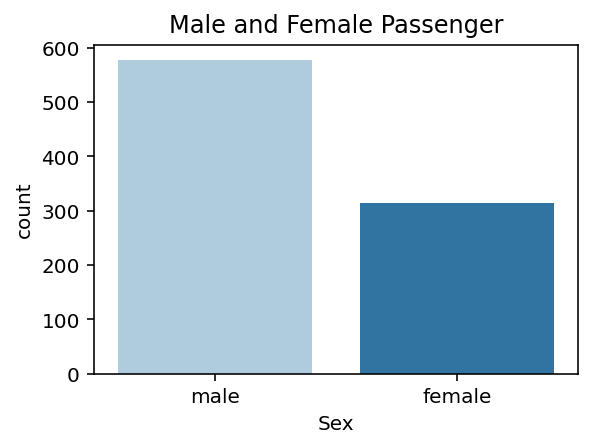

In [11]:
countplot('Sex', train, 'Male and Female Passenger')

## Male/Female Ratio


In [12]:
male_ratio = ratio(train,'Sex',0)
female_ratio = ratio(train,'Sex',1)

print(
    f'The passengers on the Titanic were {male_ratio:2.2f}% Male and {female_ratio:2.2f}% Female.'
)

The passengers on the Titanic were 64.76% Male and 35.24% Female.


## Died/Survived
We can see from below there are more passengers that Died than Survived. <br>
Over <b><i>500</b></i> Died, while under <b><i> 400</b></i> Survived  

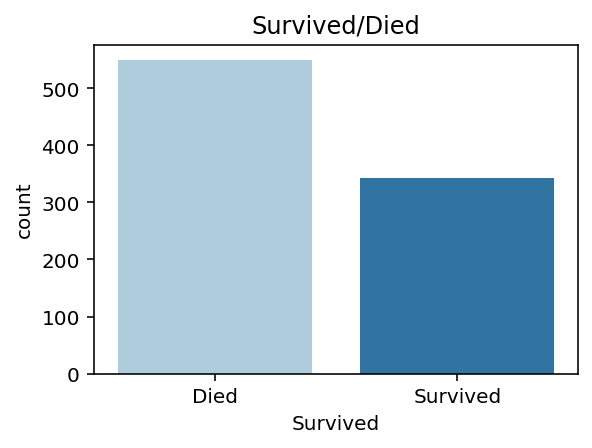

In [13]:
countplot('Survived', train, 'Survived/Died', 'Died', 'Survived')

## Died/Survived Ratio


In [14]:
died_ratio = ratio(train,'Survived',0)
#survived_ratio = ratio(train,'Survived',1)

print(type(died_ratio))

<class 'numpy.float64'>


## Passenger Class
The output below shows us the following number of passengers per class:<br>
* 1st Class: Slight over 200
* 2nd Class: Slightly under 200
* 3rd Class: Slightly under 500

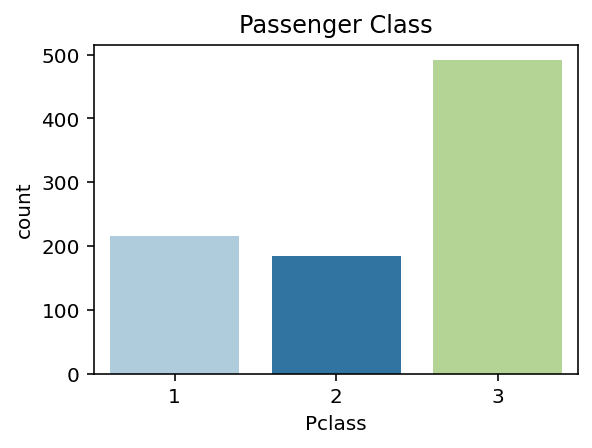

In [15]:
countplot('Pclass',train,'Passenger Class')

## Passenger Class Ratio
We can see that <b><i>over half</b></i> of the Titanic's passengers were based in Third Class, while <b><i>almost a quarter</b></i> were in First Class, and <b><i>about 20%</b></i> were in Second Class.

In [16]:
first_class_ratio = ratio(train,'Pclass',1)
second_class_ratio = ratio(train,'Pclass',2)
third_class_ratio = ratio(train,'Pclass',3)

print(
    f'About {first_class_ratio:2.2f}% Titanic passengers were in First Class.'
)
print(
    f'About {second_class_ratio:2.2f}% Titanic passengers were in Second Class.'
)
print(
    f'About {third_class_ratio:2.2f}% Titanic passengers were in Third Class.'
)

About 24.24% Titanic passengers were in First Class.
About 20.65% Titanic passengers were in Second Class.
About 55.11% Titanic passengers were in Third Class.


## How are Men and Women distributed between the different classes?
The next high level analysis is to see the way that Men and Women are distributed among the Passenger Class.

In [17]:
pclass_sex_ratio = train.pivot_table(index='Pclass', columns='Sex',aggfunc='size')
pclass_sex_ratio

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [18]:
pclass_sex_ratio

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


## Passengers Embarkation Points
The output below shows us the following embarkation numbers:
* Southampton: Over 600 
* Cherbourg: Just under 200
* Queenstown: Slightly under 100
<p>
We can see that the most popular destination port was Southampton, and then followed by Cherbourg and finally Queenstown 

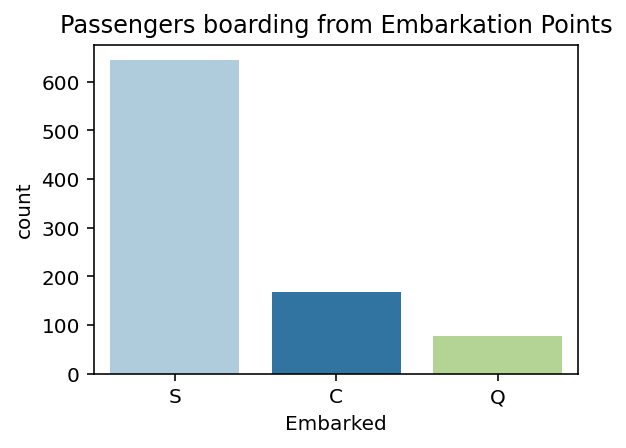

In [19]:
countplot('Embarked', train, 'Passengers boarding from Embarkation Points')

## Male/Female Embarkation Points
Below we can see the number of Women and Men that embarked from various points Embarkation Points.

In [20]:
train.pivot_table(index='Embarked', columns='Sex',aggfunc='size')

Sex,female,male
Embarked,,
C,73,95
Q,36,41
S,203,441


/var/folders/8l/0kb39xlx2tn3t6kvn8j3v1jm0000gn/T/ipykernel_1867/2800486872.py:152: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  return fig.show()


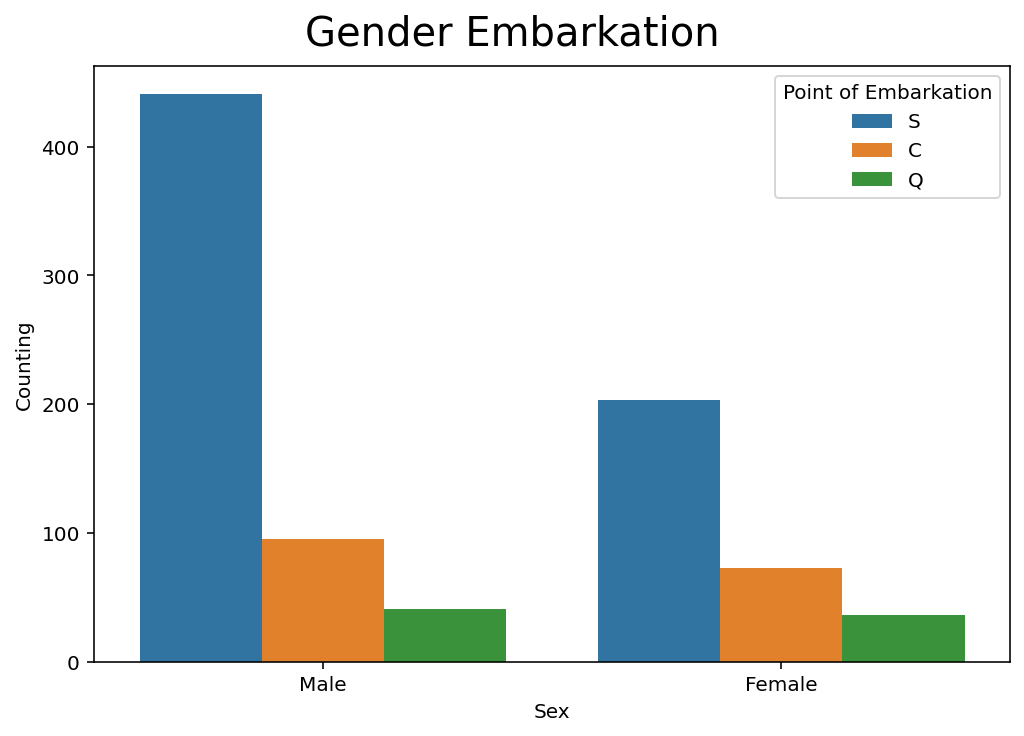

In [21]:
hue_countplot(
  'Sex',
  'Embarked',
  train,
  'Gender Embarkation',
  'Counting',
  'Sex',
  'Point of Embarkation',
  'Male',
  'Female'
)

## How Many Died/Survived
The next step is to look at the distribution of how mane of those who Died/Survived were Male/Female.<br>
Where:
* 0 - Died
* 1 - Survived

In [22]:
test_pivot = train.pivot_table(index='Survived', columns='Sex', aggfunc='size')
test_pivot

Sex,female,male
Survived,,
0,81,468
1,233,109


In [23]:
test_pivot['female'].value_counts()/len(test_pivot)*100

81     50.0
233    50.0
Name: female, dtype: float64

/var/folders/8l/0kb39xlx2tn3t6kvn8j3v1jm0000gn/T/ipykernel_1867/2800486872.py:152: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  return fig.show()


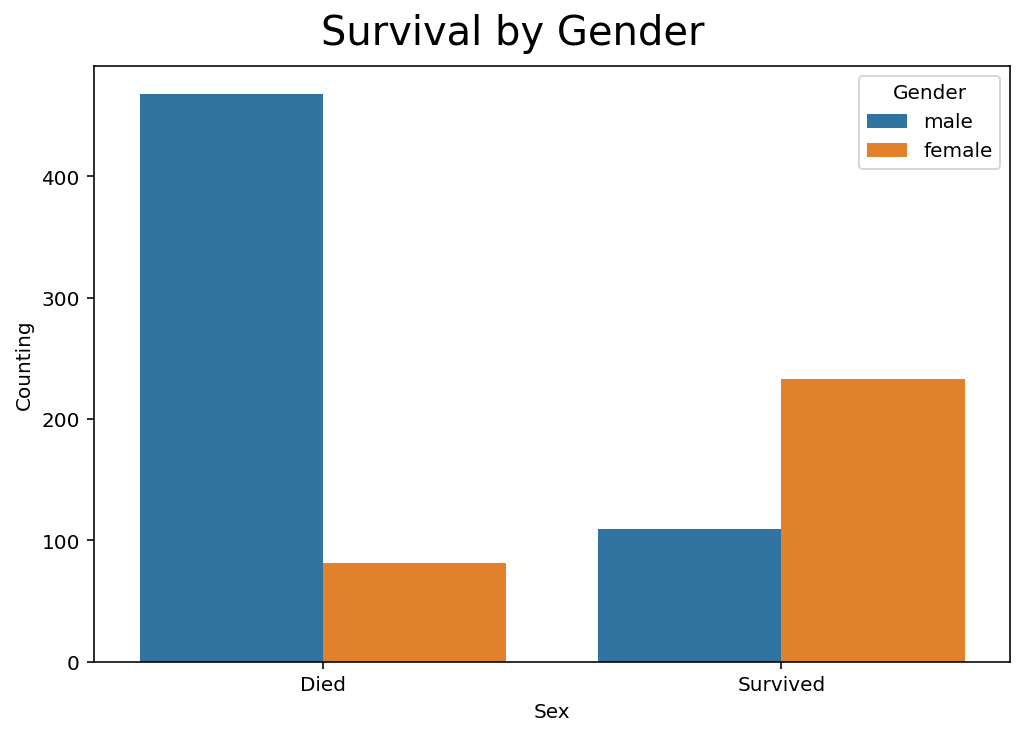

In [24]:
hue_countplot(
  'Survived',
  'Sex',
  train,
  'Survival by Gender',
  'Counting',
  'Sex',
  'Gender',
  'Died',
  'Survived'
)

## How Many Died/Survived Based on Passenger Class?
Below we have a look at how many Died/Survived based on Passenger Class.<br>
Where:
* 0 - Died
* 1 - Survived


In [25]:
train.pivot_table(index='Survived', columns='Pclass', aggfunc='size')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


/var/folders/8l/0kb39xlx2tn3t6kvn8j3v1jm0000gn/T/ipykernel_1867/2800486872.py:152: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  return fig.show()


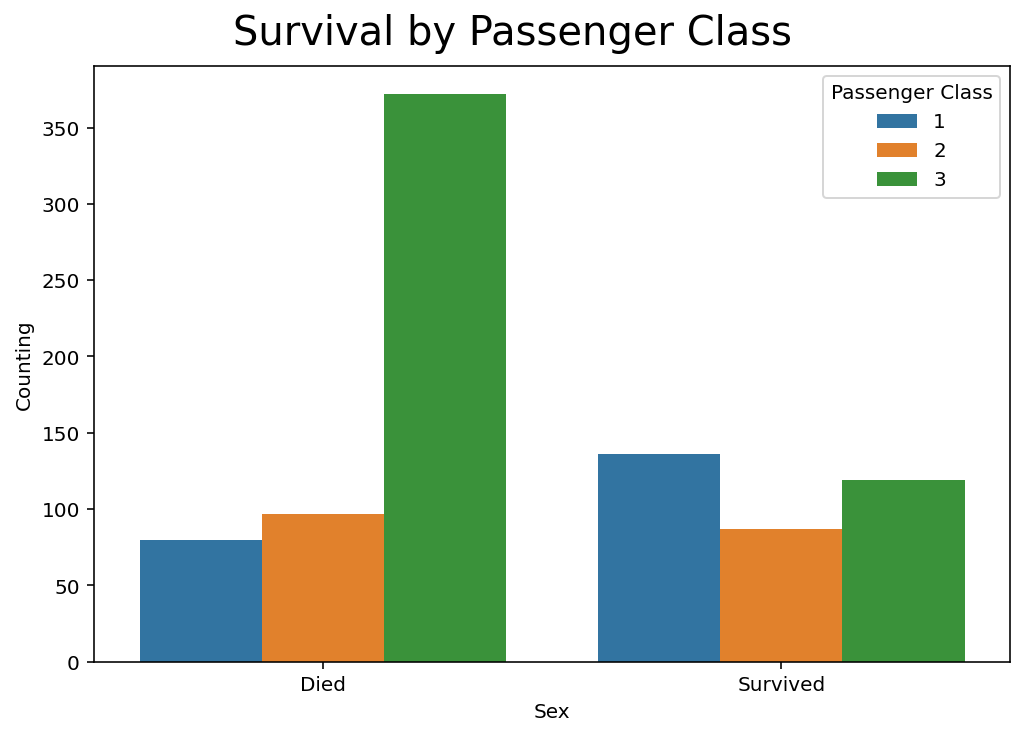

In [26]:
hue_countplot(
  'Survived',
  'Pclass',
  train,
  'Survival by Passenger Class',
  'Counting',
  'Sex',
  'Passenger Class',
  'Died',
  'Survived'
)

## How Many Died/Survived based on point of Embarkation
Below we have a look at how many Died/Survived based on Embarkation Point.<br>
Where:
* 0 - Died
* 1 - Survived

In [27]:
train.pivot_table(index='Survived', columns='Embarked', aggfunc='size')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


/var/folders/8l/0kb39xlx2tn3t6kvn8j3v1jm0000gn/T/ipykernel_1867/2800486872.py:152: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  return fig.show()


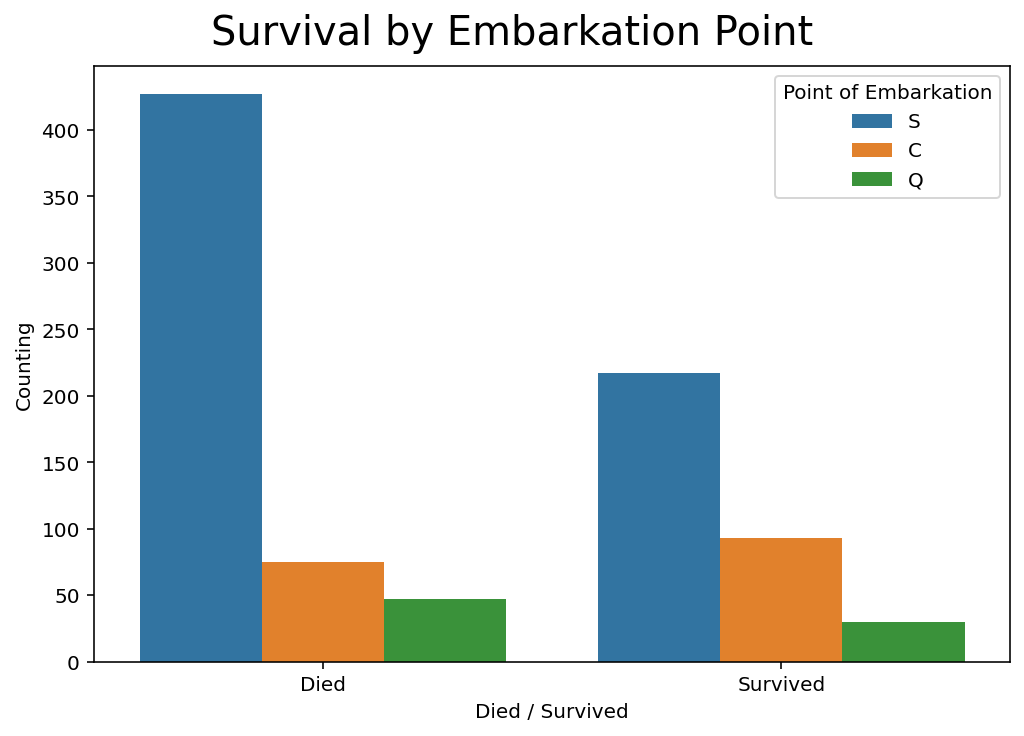

In [28]:
hue_countplot(
  'Survived',
  'Embarked',
  train,
  'Survival by Embarkation Point',
  'Counting',
  'Died / Survived',
  'Point of Embarkation',
  'Died',
  'Survived'
)

### Drop NA for Age
The data will be filtered by those who Survived and those who Died, and then I will drop the missing values so that I can proceed to plot the histogram with it's associated normal distribution over it.

In [133]:
age_surv_data = train.query('Survived == 1')
age_surv_data = age_surv_data.dropna()

age_died_data = train.query('Survived == 0')
age_died_data = age_died_data.dropna()

## The Distribution of the Data
Next we will look at the distribution of the data. This will help us understand whether we can use the <b><i>average</b></i> or the <b><i>mode</b></i>. And by looking at how the data is distributed, we are abe to better understand where the most occurrences were within the data.

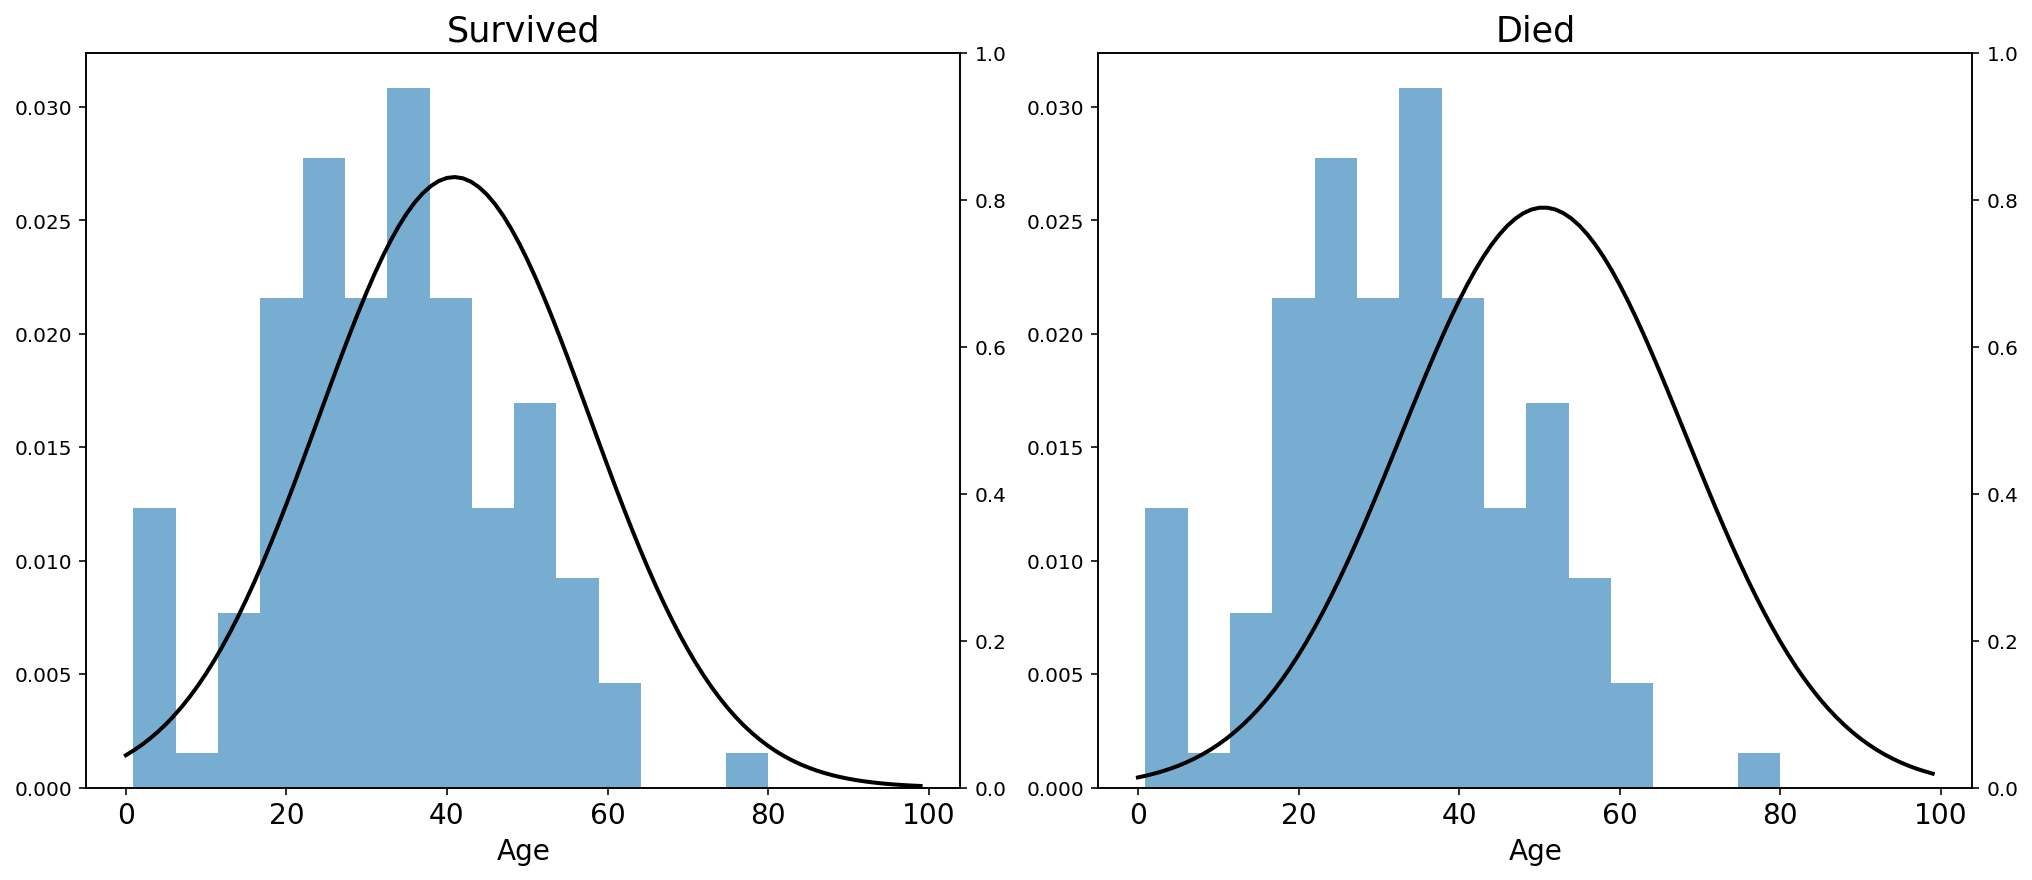

In [136]:
# Data Column
age_surv_data_col = age_surv_data['Age']
age_died_data_col = age_died_data['Age']

fig, (axs1, axs2) = plt.subplots(nrows=1, ncols=2, figsize=(14,6), constrained_layout=True, sharey=False) # sharey (because the y-axis are shared)


# ax1: Histogram Parameters, Detailed formatting, Titles, Tick parameters, X Labels

age_surv = axs1.hist(data = age_surv_data, x = 'Age', bins = 15, alpha = 0.6, density=True)
axs1.set_title('Survived', fontsize=17.5)
axs1.tick_params(axis = 'x', labelsize = 14)
axs1.set_xlabel('Age', size = 14)
axs1.twinx()

mu_age_surv, std_age_surv = norm.fit(age_surv_data_col)

xmin_surv, xmax_surv = plt.xlim()
x_surv = np.linspace(xmin_surv, xmax_surv, 100)
p_surv = norm.pdf(x_surv, mu_age_surv, std_age_surv)

axs1.plot(p_surv, 'k', linewidth = 2)

# ax2: Histogram Parameters, Detailed formatting, Titles, Tick parameters, X Labels

age_surv = axs2.hist(data = age_surv_data, x = 'Age', bins = 15, alpha = 0.6, density = True)
axs2.set_title('Died', fontsize=17.5)
axs2.tick_params(axis = 'x', labelsize = 14)
axs2.set_xlabel('Age', size = 14)
axs2.twinx()

mu_age_died, std_age_died = norm.fit(age_died_data_col)

xmin_died, xmax_died = plt.xlim()
x_died = np.linspace(xmin_died, xmax_died, 100)
p_died = norm.pdf(x_died, mu_age_died, std_age_died)

axs2.plot(p_died, 'k', linewidth = 2)

plt.show()

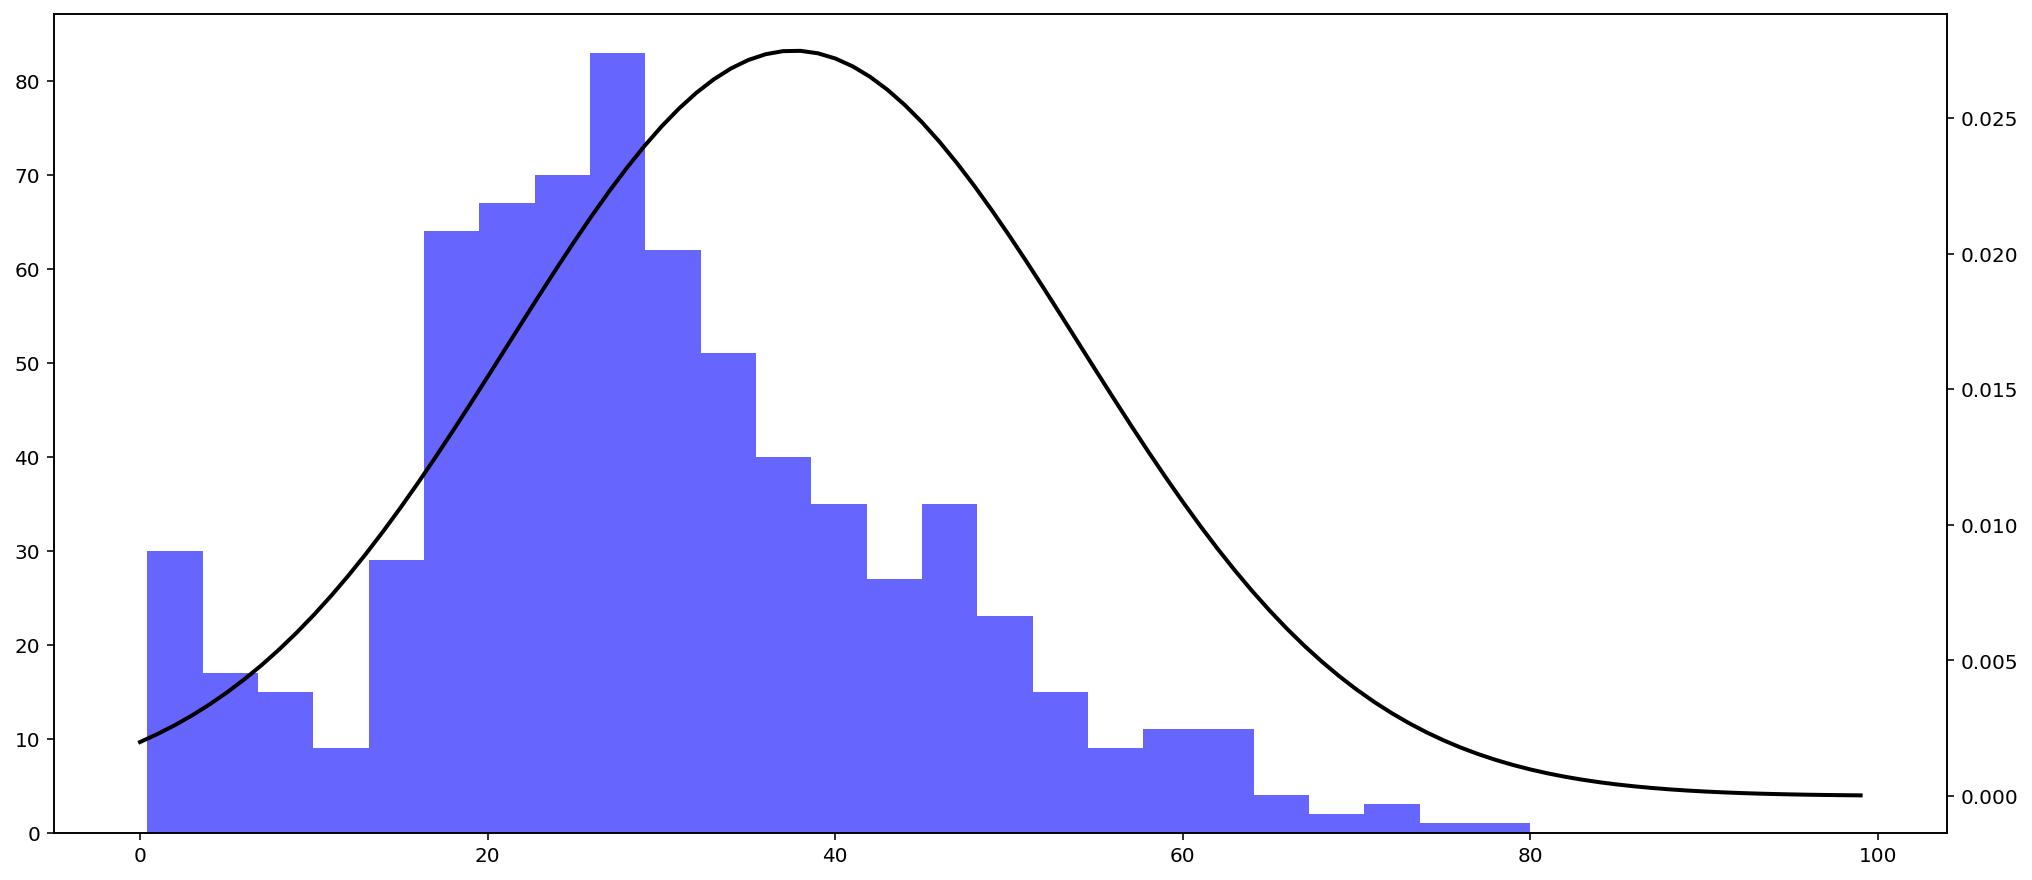

In [52]:
# Data Column
age_no_na = train[train["Age"].notna()]["Age"]

fig, axs1 = plt.subplots(figsize=(14,6), constrained_layout=True, sharey=False)

axs1.hist(age_no_na, bins=25, alpha=0.6, color='b')

'''
Normal distribution for both graphs on subplots below
'''

axs2 = axs1.twinx()
# Died Normal distribution overlay
mu_age, std_age = norm.fit(age_no_na)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_age, std_age)

plt.plot(p, 'k', linewidth = 2)

plt.show()

# Deeper Dive on those who Died / Survived

### NEED TO LOOK AT WHAT I WANT TO DO NEXT:<BR>
* Deal with NA?
* Deeper dive with Data?